In [2]:
import sys
sys.path.append("/home/peter/Coding/crypto/src")
from btc.conn.bin import client

In [25]:
data = client.get_historical_klines("BTCUSDT", client.KLINE_INTERVAL_1MINUTE, "1 day ago UTC")

In [10]:
client.get_klines??

In [26]:
from datetime import datetime
def toDateTime(timestamp):
    return datetime.fromtimestamp(timestamp / 1000)

def toTimeStamp(dt):
    return 1000 * int(datetime.timestamp(dt))

In [27]:
import pandas as pd
columns = ["Open time", "Open", "High", "Low", "Close", "Volume", "Close time", "Quote asset volume", "Number of trades", "Taker buy base asset volume", "Taker buy quote asset volume", "Can be ignored",]
df = pd.DataFrame(data, columns=columns)
for col in ["Open time", "Close time"]:
    df[col] = df[col].apply(toDateTime)
for col in ["Open", "Close", "High", "Low", "Volume", "Quote asset volume"]:
    df[col] = df[col].apply(float)

# print(type(df["Open"].iloc[0]))
print(df.head())


            Open time      Open      High       Low     Close      Volume  \
0 2021-07-28 21:27:00  39987.49  40026.43  39971.23  40007.68   73.552676   
1 2021-07-28 21:28:00  40004.24  40048.00  39973.24  39992.94   25.334834   
2 2021-07-28 21:29:00  39992.93  40038.25  39972.36  39976.05   18.171639   
3 2021-07-28 21:30:00  39976.05  39980.83  39820.48  39856.18  166.356738   
4 2021-07-28 21:31:00  39856.19  39910.06  39800.97  39910.06   87.159138   

               Close time  Quote asset volume  Number of trades  \
0 2021-07-28 21:27:59.999        2.942409e+06              1550   
1 2021-07-28 21:28:59.999        1.013551e+06               922   
2 2021-07-28 21:29:59.999        7.268861e+05              1931   
3 2021-07-28 21:30:59.999        6.634775e+06              2630   
4 2021-07-28 21:31:59.999        3.473589e+06              2447   

  Taker buy base asset volume Taker buy quote asset volume Can be ignored  
0                 57.32699100             2293403.30675566

<AxesSubplot:xlabel='Open time'>

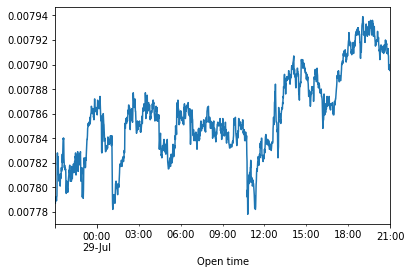

In [24]:
df.set_index('Open time')['Open'].plot()